# Desafio Data Science Semana 2

## Importação do arquivo

In [590]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [591]:
pd.set_option("display.max_columns", 100)
dados = pd.read_csv('Dados/dados_tratados.csv')
dados.head()

,Id Cliente,Cancelado,Gênero,Maior igual a 65,Parceiro,Dependentes,Meses de contrato,Serviço telefônico,Múltiplas linhas,Serviço de internet,Segurança online,Backup online,Proteção do dispositivo,Suporte técnico,TV a cabo,Streaming de filmes,Tipo de contrato,Fatura online,Forma de pagamento,Gastos diários,Valor por mês,Valor total
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,Anual,Sim,Cheque enviado,2.19,65.6,593.30
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,Cheque enviado,2.00,59.9,542.40
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra Ótica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,Cheque eletrônico,2.46,73.9,280.85
3,0011-IGKFF,Sim,Masculino,Sim,Sim,Não,13,Sim,Não,Fibra Ótica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,Cheque eletrônico,3.27,98.0,1237.85
4,0013-EXCHZ,Sim,Feminino,Sim,Sim,Não,3,Sim,Não,Fibra Ótica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,Cheque enviado,2.80,83.9,267.40


## Análise 1 - Total de cancelamentos

In [592]:
# total de cancelamentos
cancelados = dados[dados['Cancelado'] == 'Sim'].shape[0]
print('Total de cancelamentos é: ' + str(cancelados))
# % de cancelamentos
percentual = dados[dados['Cancelado'] == 'Sim'].shape[0] / dados.shape[0]
print('Este valor representa {:.2f}% do total de assinantes'.format(percentual * 100))

Total de cancelamentos é: 1869
Este valor representa 26.54% do total de assinantes


In [593]:
dados['Cancelado'].describe()

count     7043
unique       2
top        Não
freq      5174
Name: Cancelado, dtype: object

<Figure size 864x288 with 0 Axes>

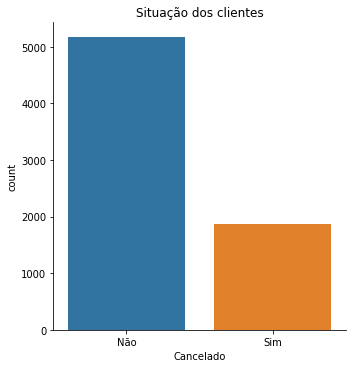

In [594]:
plt.figure(figsize=(12, 4))
sns.catplot(x='Cancelado', kind='count', data=dados)
plt.title('Situação dos clientes')
plt.show()

## Análise das colunas categóricas
### O objetivo é analisar a distribuição dos dados por coluna categórica comparando com a distribuição dos dados dos clientes que cancelaram a assinatura

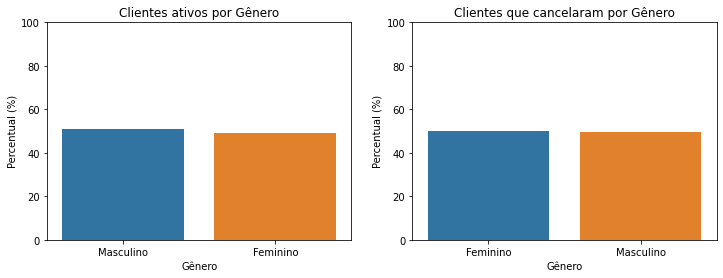

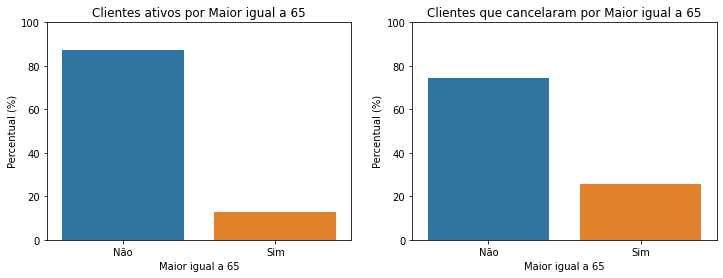

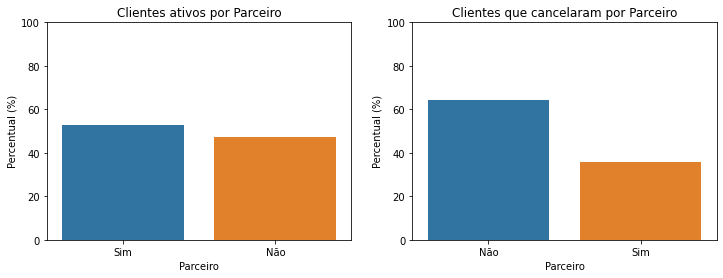

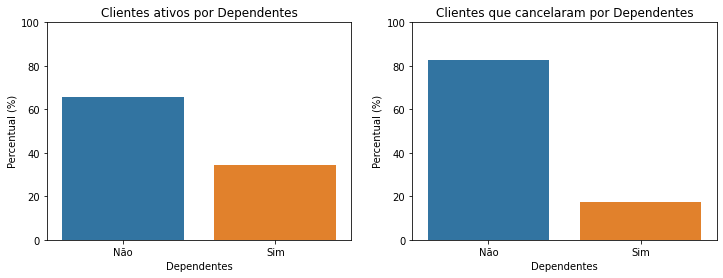

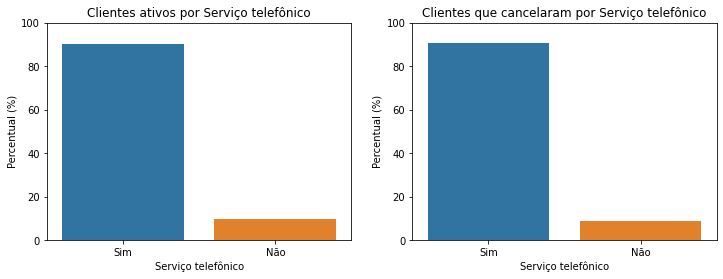

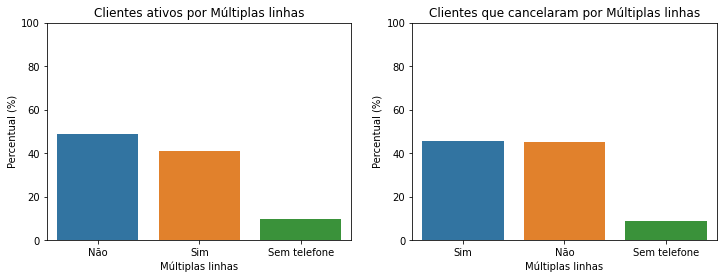

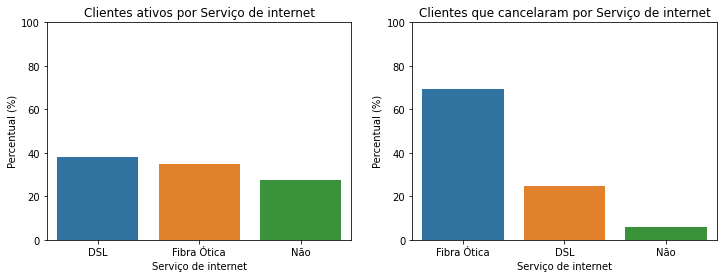

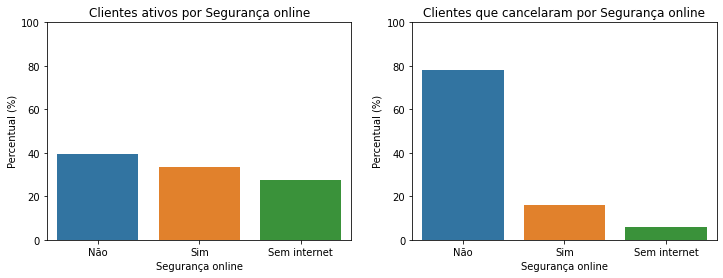

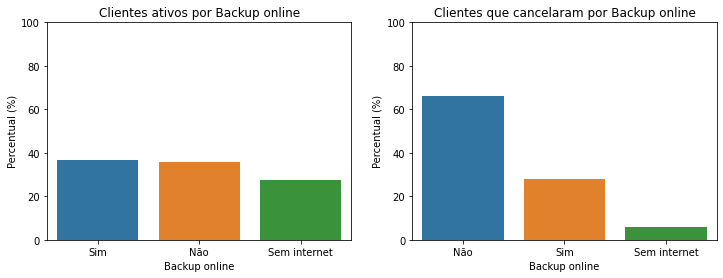

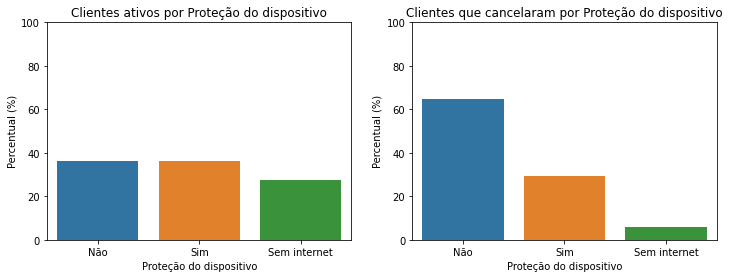

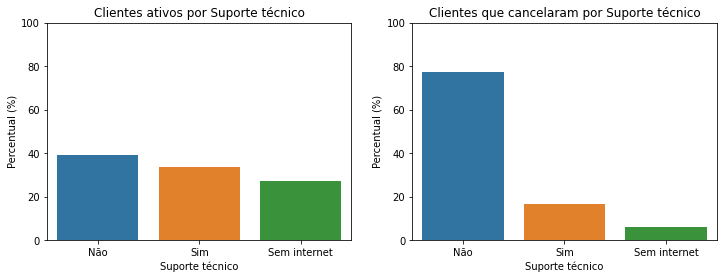

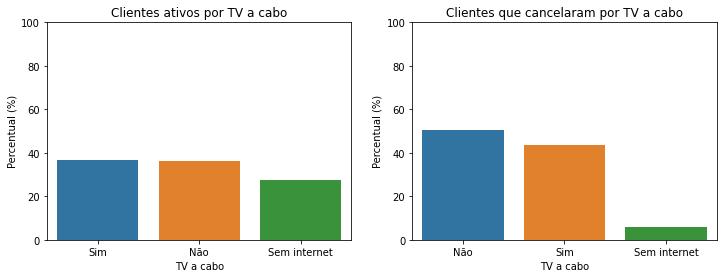

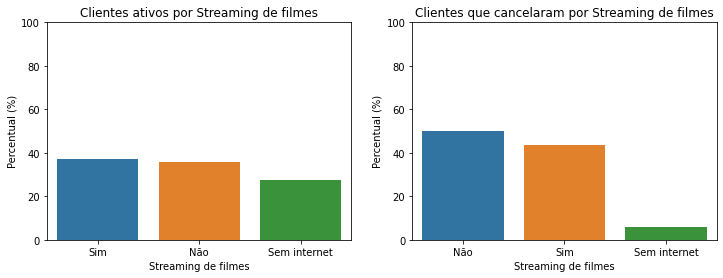

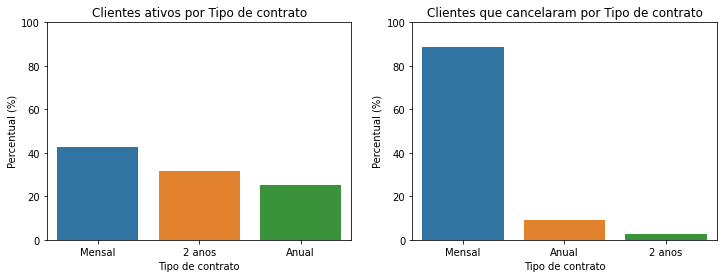

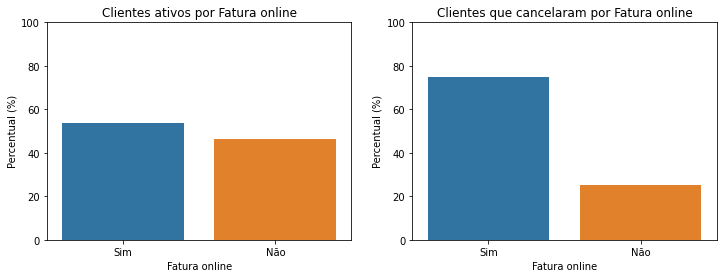

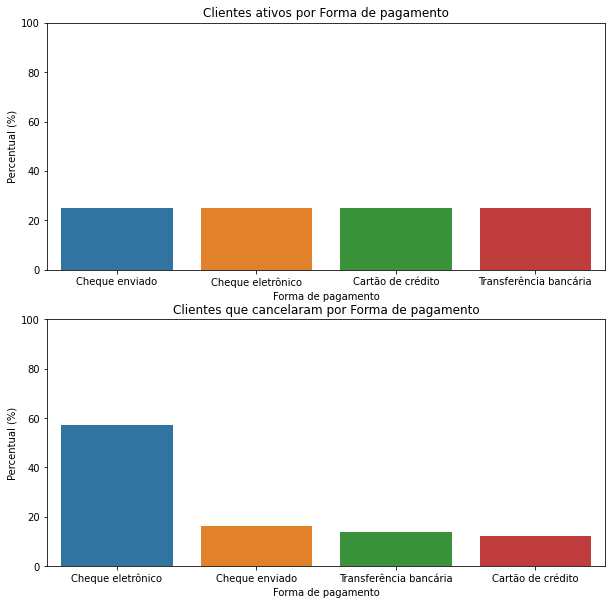

In [595]:
# função que gera gráficos de barras pra todas as colunas categóricas
def grafico_barras_por_coluna(dataset, column):
    ativos = dataset.query("Cancelado == 'Não'")
    cancelados = dataset.query("Cancelado == 'Sim'")
    lista = [ativos, cancelados]
    if column == 'Forma de pagamento':
        f, axes = plt.subplots(2, 1, figsize=(10, 10))
    else:
        f, axes = plt.subplots(1, 2, figsize=(12, 4))
    for i, dataframe in enumerate(lista):
        series = dataframe[column].value_counts(normalize=True) * 100
        df = series.to_frame().reset_index()
        df.columns = [column, 'Percentual']
        sns.barplot(x=column, y='Percentual', data=df, ax=axes[i])
        if i == 0:
            axes[i].set_title('Clientes ativos por ' + column)
        else:
            axes[i].set_title('Clientes que cancelaram por ' + column)
        axes[i].set_ylim(0,100)
        axes[i].set_ylabel('Percentual (%)')
# obtem as colunas de tipo string
name_columns = dados.columns[dados.dtypes == object].drop(['Id Cliente', 'Cancelado'])
for column in name_columns:
    grafico_barras_por_coluna(dados, column)

### o objetivo desta análise é verificar em quais variáveis as distribuições não seguiram o mesmo padrão.
### Segue as variáveis:
* Maior ou igual a 65 - os clientes maiores de 65 anos que cancelaram, representam + de 20% do total de cancelamentos sendo que eles representam menos de 20% do total de clientes ativos.
* Parceiro - a distribuição é parecida entre o total de clientes, porém parece que entre os cancelamentos o percentual aumentou entre os que não possuem parceiro.
* Dependentes - comportamento parecido com a variável parceiro.
* Serviço de internet - a taxa proporcional entre os cancelamentos aumenta quando o tipo é Fibra ótica.
* Segurança online, Backup online, Proteção do dispostivo, Suporte técnico, Tv a cabo, Streaming de filmes - a taxa proporcional de cancelados aumenta entre os que não tem o serviço.
* Tipo de contrato - a taxa proporcional entre os cancelados aumentou para o plano mensal.
* Fatura online - a taxa proporcional aumenta para quem recebe a fatura online.
* Forma de pagamento - a taxa proporcional aumenta para a forma de pagamento cheque eletrônico.
  


# Análise da variável meses de contrato

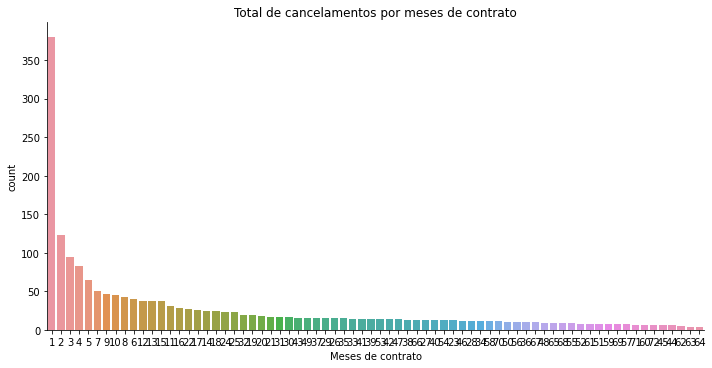

In [600]:
# análise meses de contrato para os clientes que cancelaram
meses_contrato = dados[dados['Cancelado'] == 'Sim']['Meses de contrato'].value_counts()
grid = sns.catplot(x='Meses de contrato', 
            kind='count', 
            aspect=2,
            order=meses_contrato.index,
            data=dados[dados['Cancelado'] == 'Sim'])
grid.set(title='Total de cancelamentos por meses de contrato')

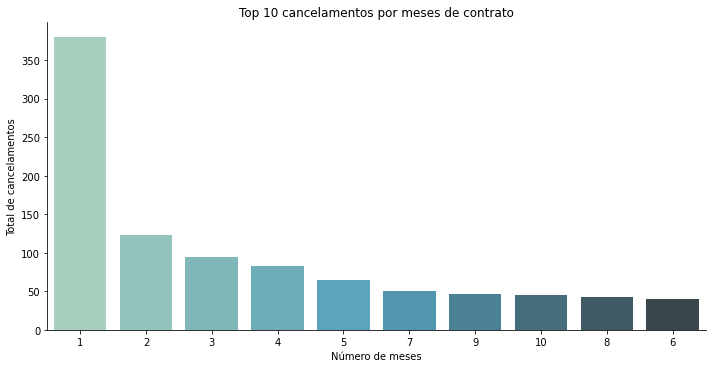

In [601]:
# o gráfico anterior não está fácil de visualizar portanto vou gerar os top 10 
# análise meses de contrato para os clientes que cancelaram (10 primeiros)
meses_contrato = dados[dados['Cancelado'] == 'Sim']['Meses de contrato'].value_counts()
grid = sns.catplot(x='Meses de contrato', 
            kind='count', 
            aspect=2,
            order=meses_contrato.index[:10],
            palette='GnBu_d',
            data=dados[dados['Cancelado'] == 'Sim'])
grid.set(title='Top 10 cancelamentos por meses de contrato')
grid.set_axis_labels(x_var='Número de meses', y_var='Total de cancelamentos')

In [602]:
contrato_menor_um_ano_e_cancelado = (dados['Cancelado'] == 'Sim') & (dados['Meses de contrato'] <= 10)
soma = dados[contrato_menor_um_ano_e_cancelado]['Meses de contrato'].value_counts().sum()
total = soma / cancelados * 100
print('Percentual de clientes que cancelaram com contrato inferior a 11 meses é {:.2f}%'.format(total))

Percentual de clientes que cancelaram com contrato inferior a 11 meses é 51.79%


### Esta análise permite concluir que a metade dos cancelamentos ocorreu em contratos inferiores a 1 ano

# Análise da variável valor por mês e valor total

In [599]:
# análise valor por mês para os clientes que cancelaram
dados.groupby(by='Cancelado')['Valor por mês'].describe()


,count,mean,std,min,25%,50%,75%,max
Cancelado,,,,,,,,
Não,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Sim,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [603]:
# análise valor por mês para os clientes que cancelaram
dados.groupby(by='Cancelado')['Valor total'].describe()

,count,mean,std,min,25%,50%,75%,max
Cancelado,,,,,,,,
Não,5174.0,2549.911442,2329.954215,0.00,572.9,1679.525,4262.85,8672.45
Sim,1869.0,1531.796094,1890.822994,18.85,134.5,703.550,2331.30,8684.80


A média dos valores por mês dos clientes que desistiram é maior do que dos clientes ativos. Entretanto, ao analisar o valor total acontece o contrário.